In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])    
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

def histogram(gray):
    hist = np.array([0]*G)
    c=0
    for row in gray:
        for pixel in row:       
            hist[pixel]+=1
    return hist

def plot_histogram(hist, width=0.5, figsize=(15,5), xlabel='Intensity', ylabel='Color', title='Histogram'):
    plt.figure(figsize=figsize)
    plt.bar(list(range(len(hist))),hist,width=width)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)

    plt.show()

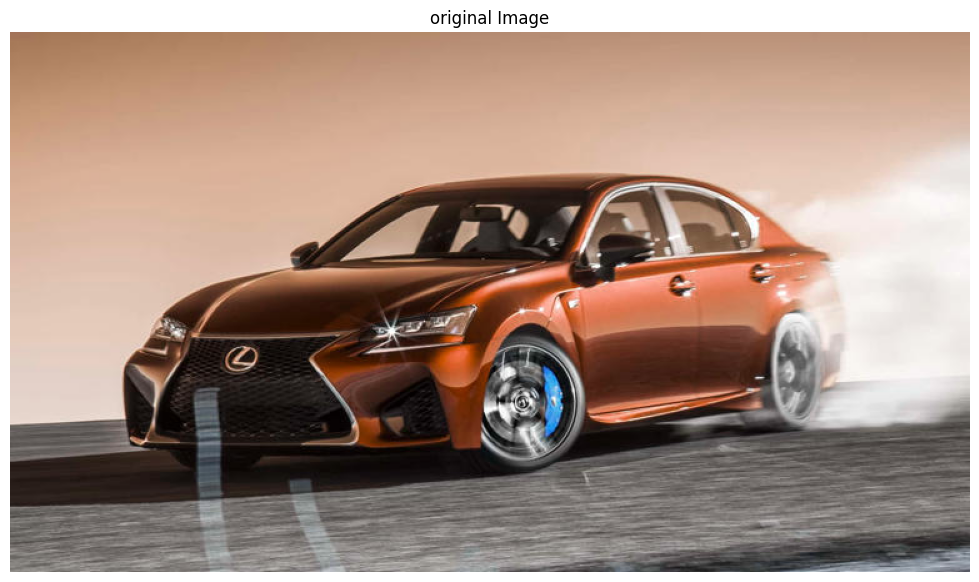

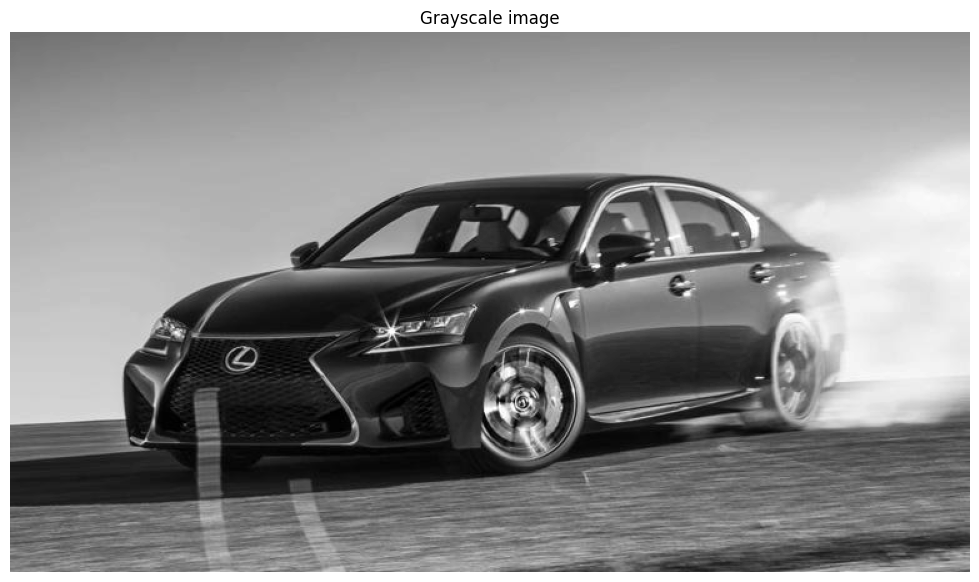

In [4]:
# read an image and convert to grayscale
# Read the image
image = cv2.imread('images/car.jpg')
# print('original image', image)
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# print("gray scale image", gray_image)
plotimage(image, "original Image")
plotimage(gray_image, "Grayscale image")

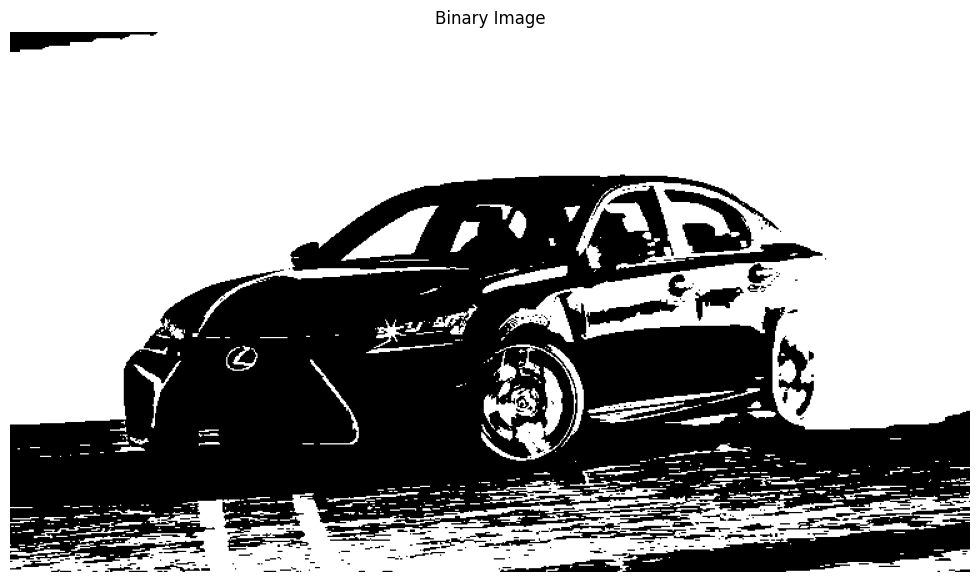

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


In [5]:
# convert to binary image
threshold_value = 120  # Threshold value (adjust as needed)
max_value = 255  # Maximum pixel intensity value
_, binary_image = cv2.threshold(gray_image, threshold_value, max_value, cv2.THRESH_BINARY)
plotimage(binary_image, "Binary Image")
cv2.imwrite("bin_img.png", binary_image)
print(binary_image)

# Image Negative

In [6]:
# read image
# Image negative
img = cv2.imread('images/cameraman.png',0) 
print(f"shape:{img.shape}")
print("orginal image\n", img)

shape:(256, 256)
orginal image
 [[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]


max 253
[[ 97  94  95 ... 102 101 101]
 [ 93  99  96 ...  99  98 100]
 [ 97  94  95 ... 102 101 101]
 ...
 [139 121 130 ... 118 116 139]
 [132 127 123 ... 120 123 140]
 [132 127 123 ... 120 123 140]]


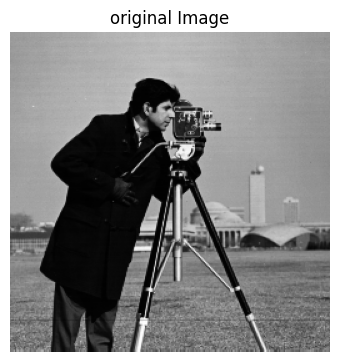

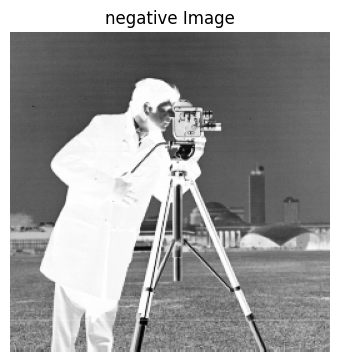

In [7]:
# To find the maximum grey level
# value in the image
L = img.max()
print("max",L)

# Maximum grey level value minus the original image gives the negative image
img_neg = L-img 
print(img_neg)
# convert the np array img_neg to 
# a png image
cv2.imwrite('images/Cameraman_Negative.png', img_neg)
plotimage(img, "original Image")
plotimage(img_neg, "negative Image")


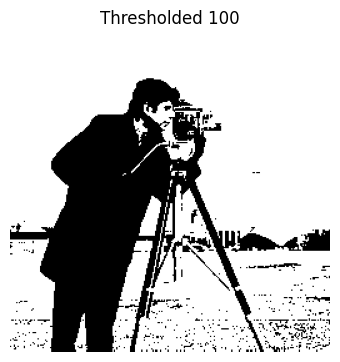

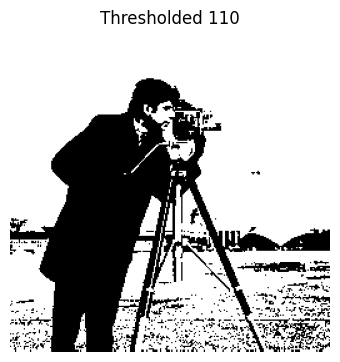

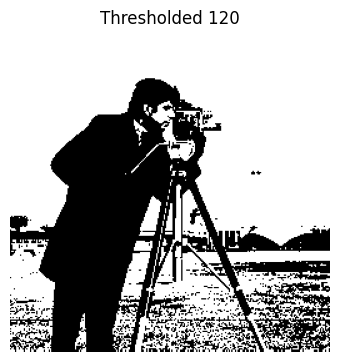

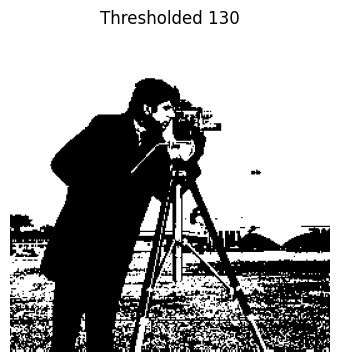

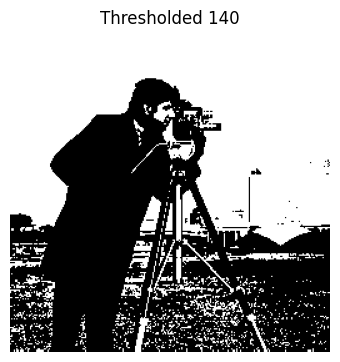

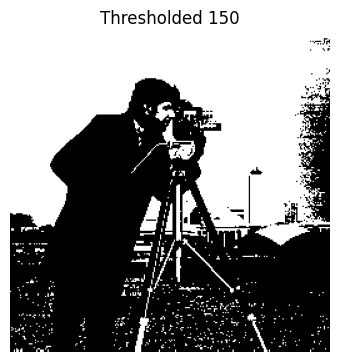

In [8]:
# To ascertain total numbers of 
# rows and columns of the image,
# size of the image
m,n = img.shape

# Thresholding without background 
# Let threshold = T
# Let pixel value in the original be denoted by r
# Let pixel value in the new image be denoted by s
# If r<T, s= 0
# If r>T, s=255

T = 150
T = [100, 110, 120, 130, 140, 150]
# create an array of zeros
for t in T:
	img_thresh = np.zeros((m,n), dtype = int) 

	for i in range(m):
		
		for j in range(n):
			
			if img[i,j] < t: 
				img_thresh[i,j]= 0
			else:
				img_thresh[i,j] = 255

	plotimage(img_thresh, f"Thresholded {t}")

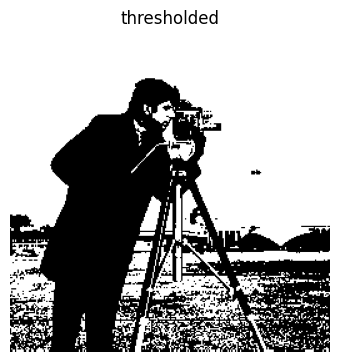

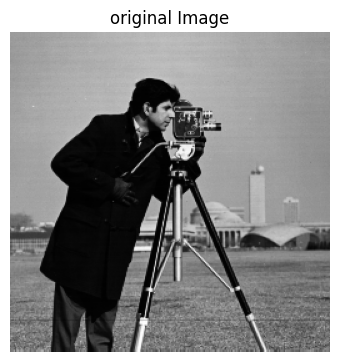

In [9]:
image = cv2.imread('images/cameraman.png', 0)  # Read the image in grayscale mode

# Apply a simple thresholding technique
threshold_value = 128  # Threshold value (adjust as needed)
max_value = 255  # Maximum pixel intensity value
_, thresholded_image = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)
plotimage(thresholded_image, "thresholded")
plotimage(image, "original Image")

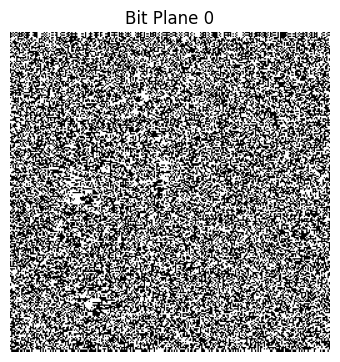

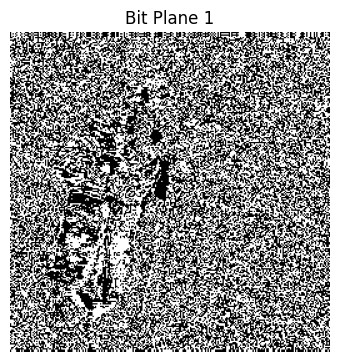

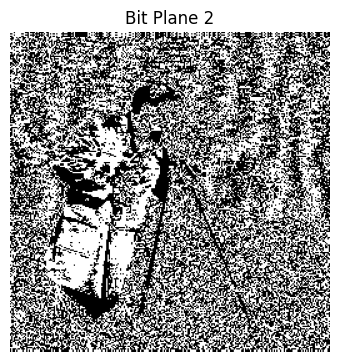

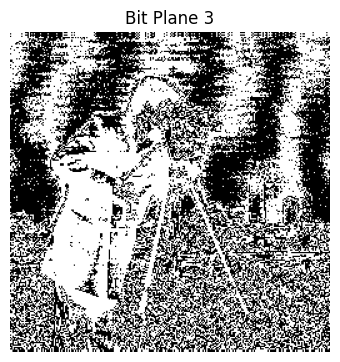

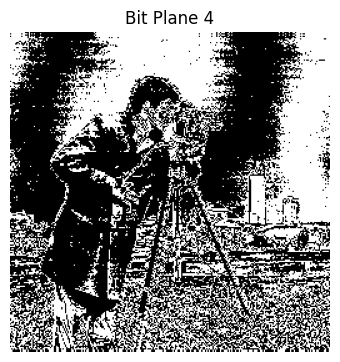

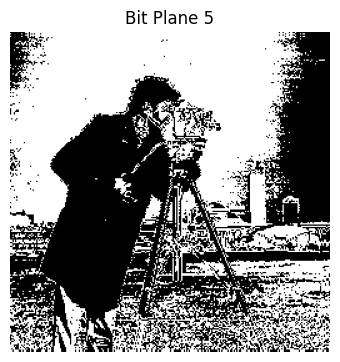

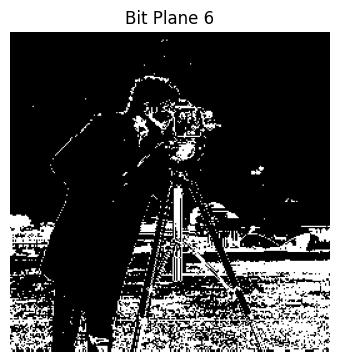

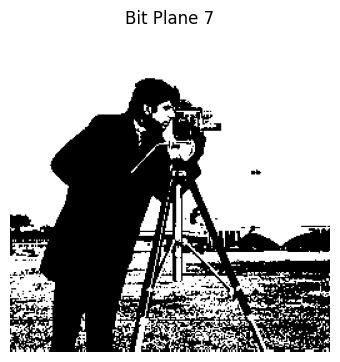

In [10]:

def bit_plane_slicing(image):
    # Convert the image to grayscale if it's not already in grayscale
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image
    
    # Initialize an empty list to store the bit planes
    bit_planes = []

    # Iterate through each bit position (0 to 7 for 8-bit grayscale)
    for bit_position in range(8):
        # Extract the bit plane corresponding to the current bit position
        bit_plane = np.bitwise_and(gray_image, 2**bit_position)
        
        # Add the bit plane to the list
        bit_planes.append(bit_plane.astype(np.uint8) * 255)  # Scale to 0-255 for visualization
    
    return bit_planes

# Load an example grayscale image
image_path = "images/cameraman.png"  # Provide the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform bit-plane slicing
bit_planes = bit_plane_slicing(image)

# Display each bit plane
for i, bit_plane            in enumerate(bit_planes):
    # cv2.imshow(f"Bit Plane {i}", bit_plane)
    plotimage(bit_plane, f'Bit Plane {i}')



# Logarithmic Enhancement

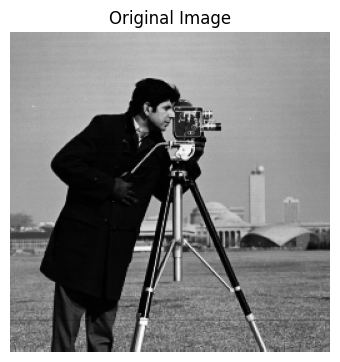

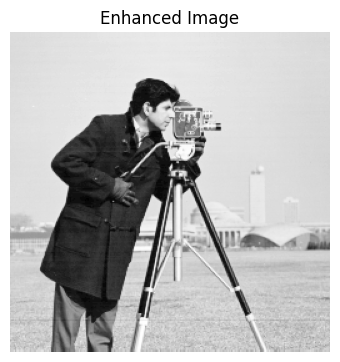

In [11]:
def logarithmic_enhancement(image, c=1):
    # Apply logarithmic transformation
    enhanced_image = c * np.log1p(image.astype(np.float32))
    
    # Scale the result to the range [0, 255]
    enhanced_image = (255 * (enhanced_image - np.min(enhanced_image)) / np.ptp(enhanced_image)).astype(np.uint8)
    
    return enhanced_image

# Load an example image (grayscale)
image_path = "images/cameraman.png"  # Provide the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform logarithmic enhancement (adjust the value of c for different enhancement levels)
enhanced_image = logarithmic_enhancement(image, c=30)

cv2.imwrite('images/enhanced_image.png', enhanced_image)
# Display the original and enhanced images
plotimage(image, 'Original Image')
plotimage(enhanced_image, 'Enhanced Image')


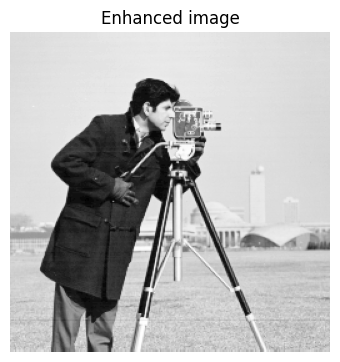

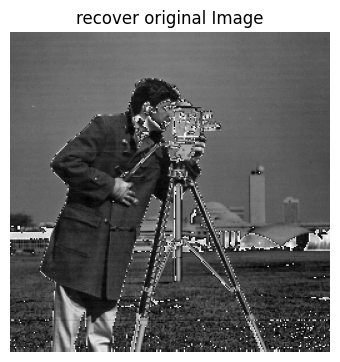

In [12]:
def inverse_log_transform(enhanced_image):
    # Apply the inverse log transform
    original_image = np.exp(enhanced_image / 255) - 1
    original_image = (original_image * 255).astype(np.uint8)  # Scale back to 0-255 range
    return original_image

# Load the enhanced image
enhanced_image_path = "images/enhanced_image.png"  # Provide the path to your enhanced image
enhanced_image = cv2.imread(enhanced_image_path, cv2.IMREAD_GRAYSCALE)

# Perform the inverse log transform
original_image = inverse_log_transform(enhanced_image)

# Display the original and recovered images
plotimage(enhanced_image, "Enhanced image")
plotimage(original_image, 'recover original Image')


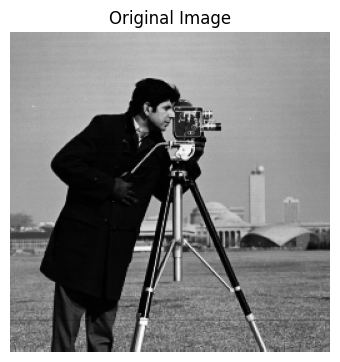

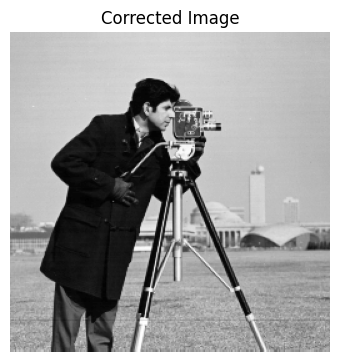

In [13]:
def gamma_correction(image, gamma=1.0):
    # Apply gamma correction
    corrected_image = np.uint8(255 * (image / 255) ** gamma)
    return corrected_image

# Load an example image
image_path = "images/cameraman.png"  # Provide the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set the gamma value (adjust as needed)
gamma_value = 0.5

# Perform gamma correction
corrected_image = gamma_correction(image, gamma_value)

plotimage(image, "Original Image")
plotimage(corrected_image, "Corrected Image")

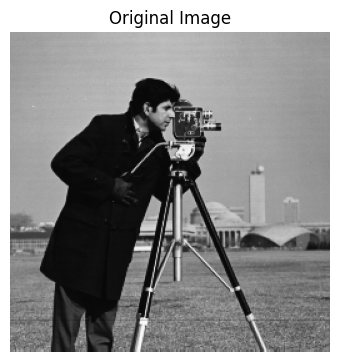

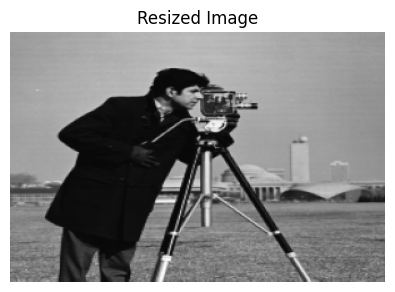

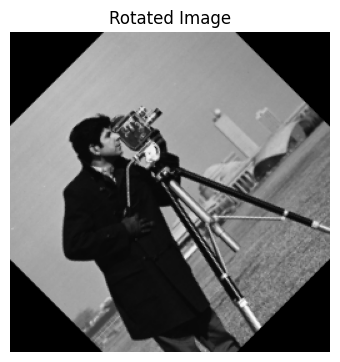

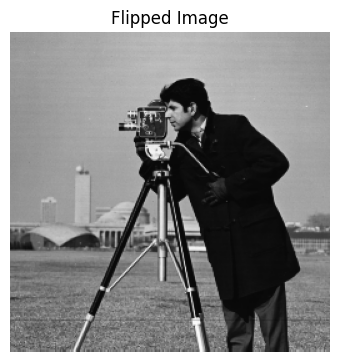

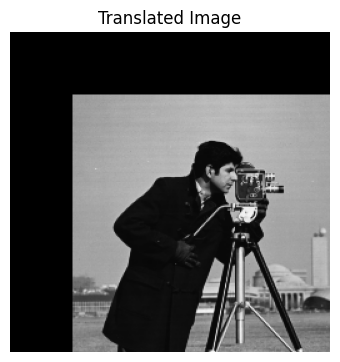

In [9]:
# Load an image
image = cv2.imread('images/cameraman.png')

# Resizing
new_width, new_height = 300, 200  # Specify the new width and height
resized_image = cv2.resize(image, (new_width, new_height))

# Rotation
rows, cols = image.shape[:2]
rotation_angle = 45  # Specify the rotation angle in degrees
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), rotation_angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# Flipping
flipped_image = cv2.flip(image, flipCode=1)  # 0 for vertical flip, 1 for horizontal flip, -1 for both

# Affine transformation (example: translation)
tx, ty = 50, 50  # Specify the translation in x and y directions
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))

# Displaying the original and transformed images
plotimage(image, title='Original Image')
plotimage(resized_image, title='Resized Image')
plotimage(rotated_image, title='Rotated Image')
plotimage(flipped_image, title='Flipped Image')
plotimage(translated_image, title='Translated Image')

# Contrast stretching and histogram equalization

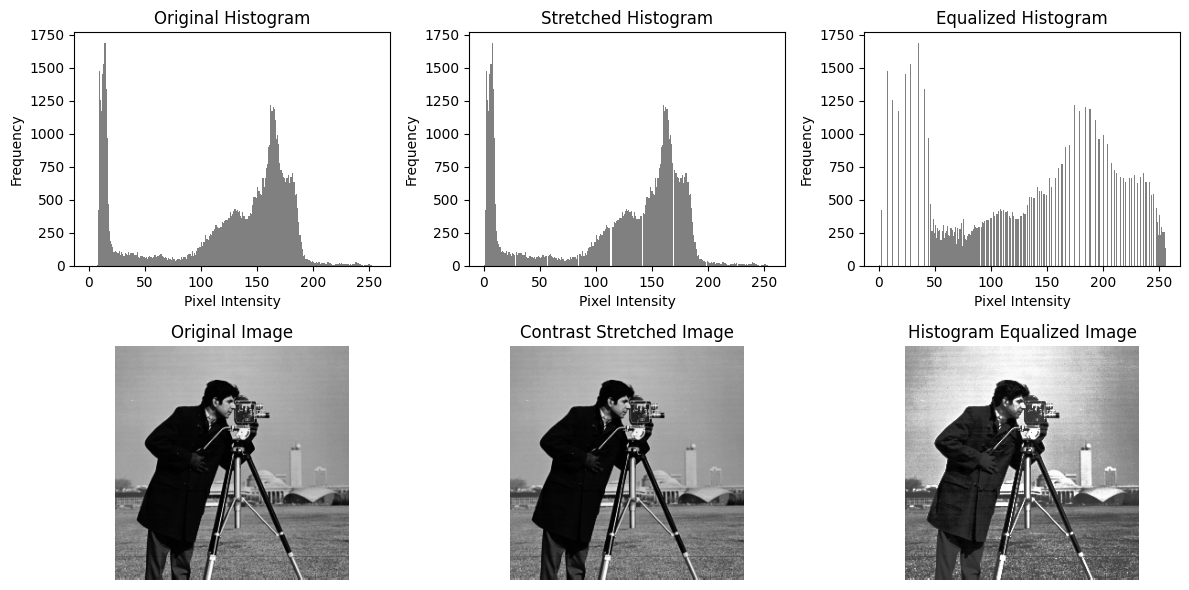

In [30]:
# Load an image
image = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)

# Display the original histogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Perform contrast stretching
min_intensity = np.min(image)
max_intensity = np.max(image)
stretched_image = np.uint8(255 * ((image - min_intensity) / (max_intensity - min_intensity)))

# Display the histogram of the contrast-stretched image
plt.subplot(2, 3, 2)
plt.hist(stretched_image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Stretched Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the histogram of the equalized image
plt.subplot(2, 3, 3)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Display the original image and processed images
plt.subplot(2, 3, 4)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Compute the mean, standard deviation, and correlation coefficient of an image

In [40]:
# Load an image
image = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
if image is None:
    print("Error: Unable to load image.")
else:
    # Compute mean and standard deviation
    mean_value = np.mean(image)
    std_dev_value = np.std(image)

    # Compute correlation coefficient
    correlation_coefficient = np.corrcoef(image.ravel(), image.ravel())[0, 1]

    # Print results
    print("Mean:", mean_value)
    print("Standard Deviation:", std_dev_value)
    print("Correlation Coefficient:", correlation_coefficient)

Mean: 118.7244873046875
Standard Deviation: 62.34123968732711
Correlation Coefficient: 1.0


# Image Smoothening Filters(Mean and Median filtering of an Image)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\dires\AppData\Local\Temp\ipykernel_18980\2311102505.py:2: SyntaxWarning: invalid escape sequence '\c'
  image = cv2.imread('images\cameraman.png')


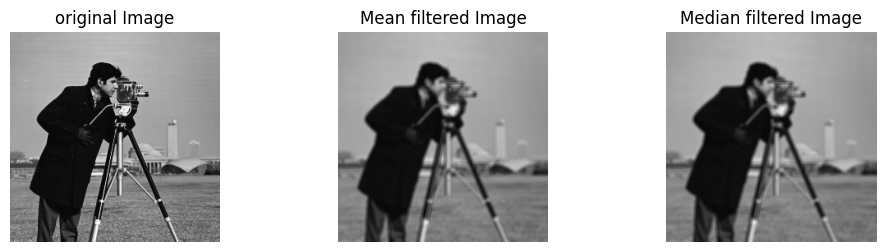

In [43]:
# Load an image
image = cv2.imread('images\cameraman.png')

# Check if the image was successfully loaded
if image is None:
    print("Error: Unable to load image.")
else:
    # Apply mean filtering
    mean_filtered = cv2.blur(image, (5, 5))  # Kernel size: 5x5

    # Apply median filtering
    median_filtered = cv2.medianBlur(image, 5)  # Kernel size: 5x5

    # Display original and filtered images
    plt.figure(figsize=(12, 6))
    plt.subplot(2,3,1)
    plt.imshow(image, cmap='gray')
    plt.title('original Image')
    plt.axis('off')
 
    plt.subplot(2,3,2)
    plt.imshow(mean_filtered, cmap='gray')
    plt.title('Mean filtered Image')
    plt.axis('off') 
    
    plt.subplot(2,3,3)
    plt.imshow(mean_filtered, cmap='gray')
    plt.title('Median filtered Image')
    plt.axis('off') 
    plt.show()

# Edge Detection

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\dires\AppData\Local\Temp\ipykernel_18980\3472559956.py:2: SyntaxWarning: invalid escape sequence '\c'
  image = cv2.imread('images\cameraman.png', cv2.IMREAD_GRAYSCALE)


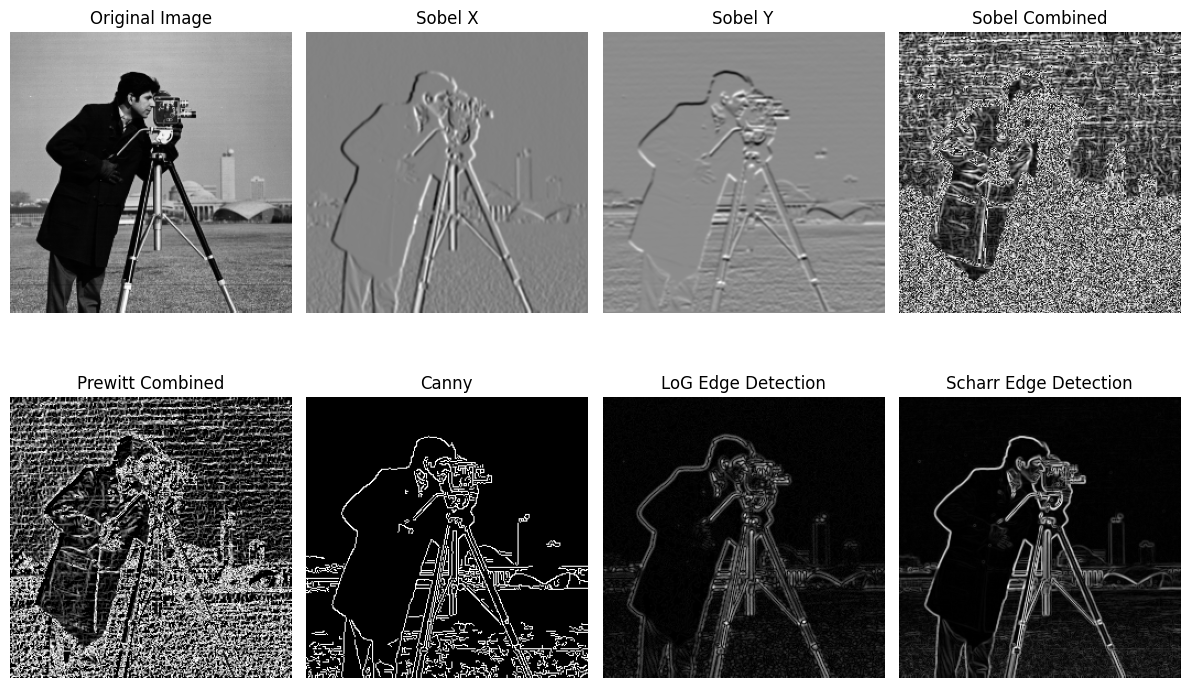

In [28]:
# Load an image
image = cv2.imread('images\cameraman.png', cv2.IMREAD_GRAYSCALE)

# Edge Detection using Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

# Edge Detection using Prewitt
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.filter2D(image, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(image, -1, prewitt_kernel_y)
prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2).astype(np.uint8)

# Edge Detection using Canny
canny = cv2.Canny(image, 100, 200)


# Laplacian of Gaussian (LoG)
# Apply Gaussian smoothing
# Load an image
image = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
image_smoothed = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Laplacian operator
laplacian = cv2.Laplacian(image_smoothed, cv2.CV_64F)

# Convert back to uint8
laplacian_uint8 = np.uint8(np.absolute(laplacian))

# Display result
# plotimage(laplacian_uint8, "LoG Edge Detection")

#Scharr Operator
# Apply Scharr operator
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
scharr_combined = cv2.magnitude(scharr_x, scharr_y)

# Convert back to uint8
scharr_combined_uint8 = np.uint8(scharr_combined)
# plotimage(scharr_combined, "Scharr Edge Detection")
# Display results


# Display results
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Combined')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(canny, cmap='gray')
plt.title('Canny')
plt.axis('off')

# plt.figure(figsize=(12, 4))
plt.subplot(2, 4, 7)
plt.imshow(laplacian_uint8, cmap='gray')
plt.title('LoG Edge Detection')
plt.axis('off') 

plt.subplot(2, 4, 8)
plt.imshow(scharr_combined, cmap='gray')
plt.title('Scharr Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# Image Compression by DCT,DPCM, HUFFMAN coding

In [51]:
import os 
from collections import Counter, defaultdict
import heapq
import pickle

# Load an image
image = cv2.imread('images\cameraman.png', cv2.IMREAD_GRAYSCALE)

# Get size of original image
original_size = os.path.getsize('images\cameraman.png')

# Perform DCT compression
_, compressed_image = cv2.imencode('.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 50])

# Save compressed image
with open('images\compressed_image.jpg', 'wb') as f:
    f.write(compressed_image)

# Get size of compressed image
DCT_compressed_size = os.path.getsize('images\compressed_image.jpg')

 
# Print sizes
print("Original Image Size:", original_size, "bytes")
print("DCT Compressed Image Size:", DCT_compressed_size, "bytes")

# Excercise with other techniques 

Original Image Size: 48826 bytes
DCT Compressed Image Size: 7167 bytes


<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
C:\Users\dires\AppData\Local\Temp\ipykernel_18980\2460544239.py:7: SyntaxWarning: invalid escape sequence '\c'
  image = cv2.imread('images\cameraman.png', cv2.IMREAD_GRAYSCALE)
C:\Users\dires\AppData\Local\Temp\ipykernel_18980\2460544239.py:10: SyntaxWarning: invalid escape sequence '\c'
  original_size = os.path.getsize('images\cameraman.png')
C:\Users\dires\AppData\Local\Temp\ipykernel_18980\2460544239.py:16: SyntaxWarning: invalid escape sequence '\c'
  with open('images\compressed_image.jpg', 'wb') as f:
C:\Users\dires\AppData\Local\Temp\ipykernel_18980\2460544239.py:20: SyntaxWarni

# Find and Draw Contours

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\dires\AppData\Local\Temp\ipykernel_18980\1415637333.py:2: SyntaxWarning: invalid escape sequence '\c'
  image = cv2.imread('images\contour.png')


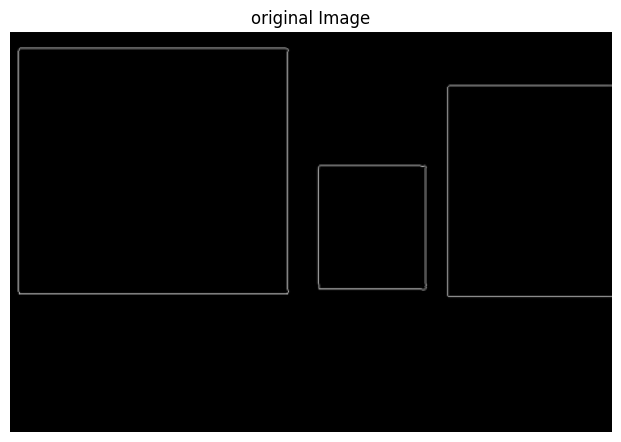

Number of Contours found = 3


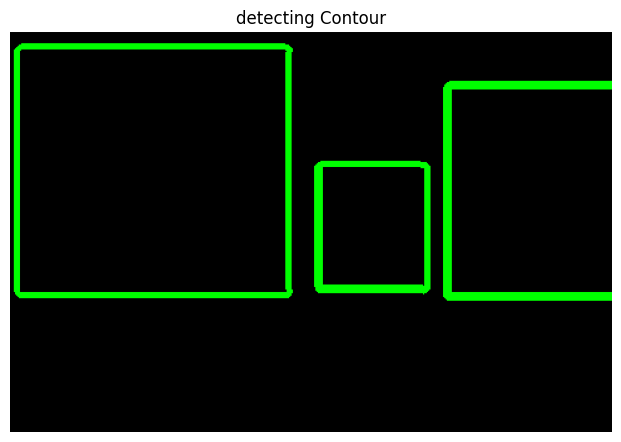

In [7]:
# Let's load a simple image with 3 black squares 
image = cv2.imread('images\contour.png') 
plotimage(image, "original Image")


# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 


# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged, 
	cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

print("Number of Contours found = " + str(len(contours))) 

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
plotimage(image, "detecting Contour")